In [2]:
import os 
print(os.getcwd())
if os.getcwd().split('/')[-1] == 'betbot_tennis':
    os.chdir(os.path.join(os.getcwd(), 'tennis'))
elif os.getcwd().split('/')[-1] == 'tennis':
    pass
else:
    raise ValueError('Not in root dir')
print(os.getcwd())
from utils.classes import TennisMatchDataset
import numpy as np
import pandas as pd
import json
import time


tournaments = [   
                                        'past-french-open-atp-singles', 
                                        'past-australian-open-atp-singles',
                                        'past-rome-atp-singles', 
                                        'past-madrid-atp-singles',
                                        'past-monte-carlo-atp-singles',
                                        'past-lyon-atp-singles',
                                        'past-barcelona-atp-singles',
                                        'past-munich-atp-singles',
                                        'past-geneva-atp-singles',
                                        'past-estoril-atp-singles',
                                        'past-houston-atp-singles',
                                        'past-marrakech-atp-singles',
                                        'past-bucharest-atp-singles',
                                        'past-doha-atp-singles',
                                        'past-dubai-atp-singles',
                                        'past-indian-wells-atp-singles',
                                        'past-miami-atp-singles',
                                        'past-acapulco-atp-singles',
                                        'past-rio-de-janeiro-atp-singles',
                                        'past-santiago-atp-singles',
                                        'past-brisbane-atp-singles',
                                        'past-hong-kong-atp-singles',
                                        'past-auckland-atp-singles',
                                        'past-adelaide-atp-singles',
                                        'past-montpellier-atp-singles',
                                        'past-marseille-atp-singles',
                                        'past-cordoba-atp-singles',
                                        'past-dallas-atp-singles',
                                        'past-french-open-2023-atp-singles',
                                        'past-australian-open-2023-atp-singles',
                                        'past-rome-2023-atp-singles',
                                        'past-madrid-2023-atp-singles',
                                        'past-monte-carlo-2023-atp-singles',
                                        'past-lyon-2023-atp-singles',
                                        'past-barcelona-2023-atp-singles',
                                        'past-munich-2023-atp-singles',
                                        'past-geneva-2023-atp-singles',
                                        'past-estoril-2023-atp-singles',
                                        'past-houston-2023-atp-singles',
                                        'past-marrakech-2023-atp-singles', 
                                        'past-doha-2023-atp-singles',
                                        'past-dubai-2023-atp-singles',
                                        'past-indian-wells-2023-atp-singles',
                                        'past-miami-2023-atp-singles',
                                        'past-acapulco-2023-atp-singles',
                                        'past-rio-de-janeiro-2023-atp-singles',
                                        'past-santiago-2023-atp-singles',
                                        'past-auckland-2023-atp-singles',
                                        'past-adelaide-2023-atp-singles',
                                        'past-montpellier-2023-atp-singles',
                                        'past-marseille-2023-atp-singles',
                                        'past-cordoba-2023-atp-singles',
                                        'past-dallas-2023-atp-singles',
                                        'past-stuttgart-2023-atp-singles',
                                        'past-hertogenbosch-2023-atp-singles',
                                        'past-halle-2023-atp-singles',
                                        'past-london-2023-atp-singles',
                                        'past-mallorca-2023-atp-singles',
                                        'past-eastbourne-2023-atp-singles',
                                        'past-wimbledon-2023-atp-singles',
                                        'past-hamburg-2023-atp-singles',
                                          'past-bastad-2023-atp-singles',
                                          'past-gstaad-2023-atp-singles', ###
                                          'past-newport-2023-atp-singles',
                                          'past-umag-2023-atp-singles',
                                          'past-atlanta-2023-atp-singles',
                                          'past-washington-2023-atp-singles',
                                          'past-cincinnati-2023-atp-singles',
                                          'past-winston-salem-2023-atp-singles',
                                          'past-us-open-2023-atp-singles', ###
                                          'past-chengdu-2023-atp-singles',
                                          'past-zhuhai-2023-atp-singles', ###
                                          'past-tokyo-2023-atp-singles',
                                          'past-beijing-2023-atp-singles', ###
                                          'past-shanghai-2023-atp-singles',
                                          'past-stockholm-2023-atp-singles',
                                          'past-antwerp-2023-atp-singles', ###
                                          'past-vienna-2023-atp-singles',
                                          'past-basel-2023-atp-singles',
                                          'past-paris-2023-atp-singles',
                                          'past-metz-2023-atp-singles',
                                          'past-finals-turin-2023-atp-singles',
                                          'past-stuttgart-atp-singles',
                                          'past-hertogenbosch-atp-singles',
                                          'past-halle-atp-singles',
                                          'past-london-atp-singles',
                                     ]



tennis_dataset = TennisMatchDataset(tournaments)

/users/eleves-b/2021/mathias.grau/betbot_tennis/tennis
/users/eleves-b/2021/mathias.grau/betbot_tennis/tennis
Loading data for tournaments {'past-mallorca-2023-atp-singles', 'past-bastad-2023-atp-singles', 'past-montpellier-atp-singles', 'past-barcelona-atp-singles', 'past-marrakech-2023-atp-singles', 'past-hamburg-2023-atp-singles', 'past-geneva-atp-singles', 'past-shanghai-2023-atp-singles', 'past-stuttgart-2023-atp-singles', 'past-zhuhai-2023-atp-singles', 'past-hertogenbosch-2023-atp-singles', 'past-indian-wells-atp-singles', 'past-french-open-2023-atp-singles', 'past-geneva-2023-atp-singles', 'past-marrakech-atp-singles', 'past-dallas-atp-singles', 'past-adelaide-atp-singles', 'past-washington-2023-atp-singles', 'past-indian-wells-2023-atp-singles', 'past-doha-atp-singles', 'past-eastbourne-2023-atp-singles', 'past-hertogenbosch-atp-singles', 'past-estoril-atp-singles', 'past-rome-atp-singles', 'past-australian-open-atp-singles', 'past-stockholm-2023-atp-singles', 'past-houston-20

In [3]:
import pandas as pd
match_id = tennis_dataset.get_matches_ids()[0]

# Initialize the player and match information
player_fr_id = tennis_dataset.get_match(match_id).get_players_id()[0]
player_fr_id = 'UkhgIFEq'
# /home/projects/vaccine/people/matgra/repositories/betbot_tennis/tennis/data/files/fr_to_atp_ids.json
fr_to_atp_ids = json.load(open('/users/eleves-b/2021/mathias.grau/betbot_tennis/tennis/data/files/fr_to_atp_ids.json'))
players_id_to_name =json.load(open('/users/eleves-b/2021/mathias.grau/betbot_tennis/tennis/data/files/players_ids.json'))['players_ids']

player_atp_id = fr_to_atp_ids[player_fr_id]
player_name = players_id_to_name[player_atp_id]
print(player_name)

player_matches = tennis_dataset.get_matches_player(player_fr_id)

# Define the columns for the DataFrame
statistics_df = pd.DataFrame(columns=[
    'match_id',
    'date',
    'tournament',
    'opponent_fr_id',
    'opponent_name',
    'player_number_sets',
    'opponent_number_sets',
    'winner',
    'Aces', 
    'Double Faults', 
    '1st Serve Percentage', 
    '1st Serve Points Won', 
    '2nd Serve Points Won', 
    'Break Points Saved', 
    '1st Return Points Won', 
    '2nd Return Points Won',
    'Break Points Converted',
    'Winners',
    'Unforced Errors',
    'Net Points Won',
    'Max Points In Row',
    'Service Points Won',
    'Return Points Won',
    'Total Points Won',
    'Max Games In Row',
    'Service Games Won',
    'Return Games Won',
    'Total Games Won',
])
statistics_df.set_index('match_id', inplace=True)

# Iterate through each match
for player_match in player_matches:
    match_id = player_match.match_id
    players = player_match.get_players_id()
    
    if player_fr_id == players[0]:
        indice_player = 0
        number_player = 1
        opponent_fr_id = players[1]
        opponent_name = player_match.player2name
        player_number_sets = player_match.setsplayer1
        opponent_number_sets = player_match.setsplayer2
        if player_match.winner == 1:
            winner = 1
        else :
            winner = -1
    else:
        indice_player = 1
        number_player = 2 
        opponent_fr_id = players[0]
        opponent_name = player_match.player1name
        player_number_sets = player_match.setsplayer2
        opponent_number_sets = player_match.setsplayer1
        if player_match.winner == -1:
            winner = 1
        else :
            winner = -1

    match_data = player_match.get_match_data()
    date = player_match.date
    tournament = match_data['tournament']

    # Fill DataFrame for match_id column by column
    statistics_df.loc[match_id, 'date'] = date
    statistics_df.loc[match_id, 'tournament'] = tournament
    statistics_df.loc[match_id, 'opponent_fr_id'] = opponent_fr_id
    statistics_df.loc[match_id, 'opponent_name'] = opponent_name
    statistics_df.loc[match_id, 'player_number_sets'] = player_number_sets
    statistics_df.loc[match_id, 'opponent_number_sets'] = opponent_number_sets
    statistics_df.loc[match_id, 'winner'] = winner

    for category in match_data['statistics']:
        category_name = category['categoryName']
        player_value = category[f'player{number_player}Value']
        if category_name in statistics_df.columns:
            statistics_df.loc[match_id, category_name] = player_value

# Print the DataFrame to check the results
statistics_df.sort_values(by='date', inplace=True)
statistics_df['date_str'] = statistics_df['date'].apply(lambda x: time.strftime('%Y-%m-%d', time.localtime(x)))
statistics_df['total_number_of_sets'] = statistics_df['player_number_sets'] + statistics_df['opponent_number_sets']
statistics_df['max_number_of_sets'] = statistics_df[['player_number_sets', 'opponent_number_sets']].max(axis=1)
# convert num% to float for num
statistics_df['1st Serve Percentage'] = statistics_df['1st Serve Percentage'].str.rstrip('%').astype('float') / 100.0
# convert 'num% (a/b)' to float for num
statistics_df['1st Serve Points Won'] = statistics_df['1st Serve Points Won'].str.split(' ').str[0].str.rstrip('%').astype('float') / 100.0
statistics_df['2nd Serve Points Won'] = statistics_df['2nd Serve Points Won'].str.split(' ').str[0].str.rstrip('%').astype('float') / 100.0
statistics_df['Break Points Saved'] = statistics_df['Break Points Saved'].str.split(' ').str[0].str.rstrip('%').astype('float') / 100.0
statistics_df['1st Return Points Won'] = statistics_df['1st Return Points Won'].str.split(' ').str[0].str.rstrip('%').astype('float') / 100.0
statistics_df['2nd Return Points Won'] = statistics_df['2nd Return Points Won'].str.split(' ').str[0].str.rstrip('%').astype('float') / 100.0
statistics_df['Break Points Converted'] = statistics_df['Break Points Converted'].str.split(' ').str[0].str.rstrip('%').astype('float') / 100.0
statistics_df['Net Points Won'] = statistics_df['Net Points Won'].str.split(' ').str[0].str.rstrip('%').astype('float') / 100.0
statistics_df['Service Points Won'] = statistics_df['Service Points Won'].str.split(' ').str[0].str.rstrip('%').astype('float') / 100.0
statistics_df['Return Points Won'] = statistics_df['Return Points Won'].str.split(' ').str[0].str.rstrip('%').astype('float') / 100.0
statistics_df['Total Points Won'] = statistics_df['Total Points Won'].str.split(' ').str[0].str.rstrip('%').astype('float') / 100.0
statistics_df['Service Games Won'] = statistics_df['Service Games Won'].str.split(' ').str[0].str.rstrip('%').astype('float') / 100.0
statistics_df['Return Games Won'] = statistics_df['Return Games Won'].str.split(' ').str[0].str.rstrip('%').astype('float') / 100.0
statistics_df['total_number_of_games'] = statistics_df['Total Games Won'].str.split('/').str[1].str.rstrip(')').astype('int')
statistics_df['number_of_games_won'] = statistics_df['Total Games Won'].str.split('(').str[1].str.split('/').str[0].astype('int')
statistics_df['asian_handicap'] = (statistics_df['total_number_of_games'] - 2*statistics_df['number_of_games_won'])
statistics_df['Total Games Won'] = statistics_df['Total Games Won'].str.split(' ').str[0].str.rstrip('%').astype('float') / 100.0
statistics_df = statistics_df[statistics_df['total_number_of_sets'] != 0].dropna()
statistics_df['Aces per set'] = statistics_df['Aces'].astype(float)/statistics_df['total_number_of_sets']
statistics_df['Double Faults per set'] = statistics_df['Double Faults'].astype(float)/statistics_df['total_number_of_sets']
statistics_df['Winners per set'] = statistics_df['Winners'].astype(float)/statistics_df['total_number_of_sets']
statistics_df['Unforced Errors per set'] = statistics_df['Unforced Errors'].astype(float)/statistics_df['total_number_of_sets']
statistics_df['Net Points Won per set'] = statistics_df['Net Points Won'].astype(float)/statistics_df['total_number_of_sets']


statistics_df

{'fullname': 'carlos-alcaraz', 'playerName': 'Carlos Alcaraz', 'href': '/en/players/carlos-alcaraz/a0e2/overview'}


,date,tournament,opponent_fr_id,opponent_name,player_number_sets,opponent_number_sets,winner,Aces,Double Faults,1st Serve Percentage,...,total_number_of_sets,max_number_of_sets,total_number_of_games,number_of_games_won,asian_handicap,Aces per set,Double Faults per set,Winners per set,Unforced Errors per set,Net Points Won per set
match_id,,,,,,,,,,,,,,,,,,,,,
t8iBuN9q,1678595100.0,indian-wells-2023,rBm7dcxH,Kokkinakis T.,2,0,1,1,1,0.64,...,2,2,18,12,-6,0.5,0.5,10.5,4.5,0.35
rFhWaXwg,1678765200.0,indian-wells-2023,f3zfMU5i,Griekspoor T.,2,0,1,0,3,0.61,...,2,2,21,12,-3,0.0,1.5,6.5,3.0,0.32
bXXQWdJg,1679016900.0,indian-wells-2023,CzXh4LAb,Auger-Aliassime F.,2,0,1,2,2,0.62,...,2,2,20,12,-4,1.0,1.0,13.0,4.0,0.345
pfNlpBQ5,1679180400.0,indian-wells-2023,6HdC3z4H,Sinner J.,2,0,1,5,1,0.72,...,2,2,21,12,-3,2.5,0.5,14.0,7.0,0.36
xQwqr8Fj,1679267400.0,indian-wells-2023,O8qG0Nhb,Medvedev D.,2,0,1,1,0,0.76,...,2,2,17,12,-7,0.5,0.0,9.5,5.0,0.385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dEdsR0Vr,1717525800.0,french-open,hb6oWfc6,Tsitsipas S.,3,0,1,3,1,0.73,...,3,3,31,18,-5,1.0,0.333333,9.0,7.0,0.213333
A3BuALkB,1717764000.0,french-open,6HdC3z4H,Sinner J.,3,2,1,8,7,0.66,...,5,3,45,23,-1,1.6,1.4,13.0,11.6,0.118
r7d2Onw1,1717938600.0,french-open,dGbUhw9m,Zverev A.,3,2,1,3,6,0.60,...,5,3,44,25,-6,0.6,1.2,10.4,11.2,0.126


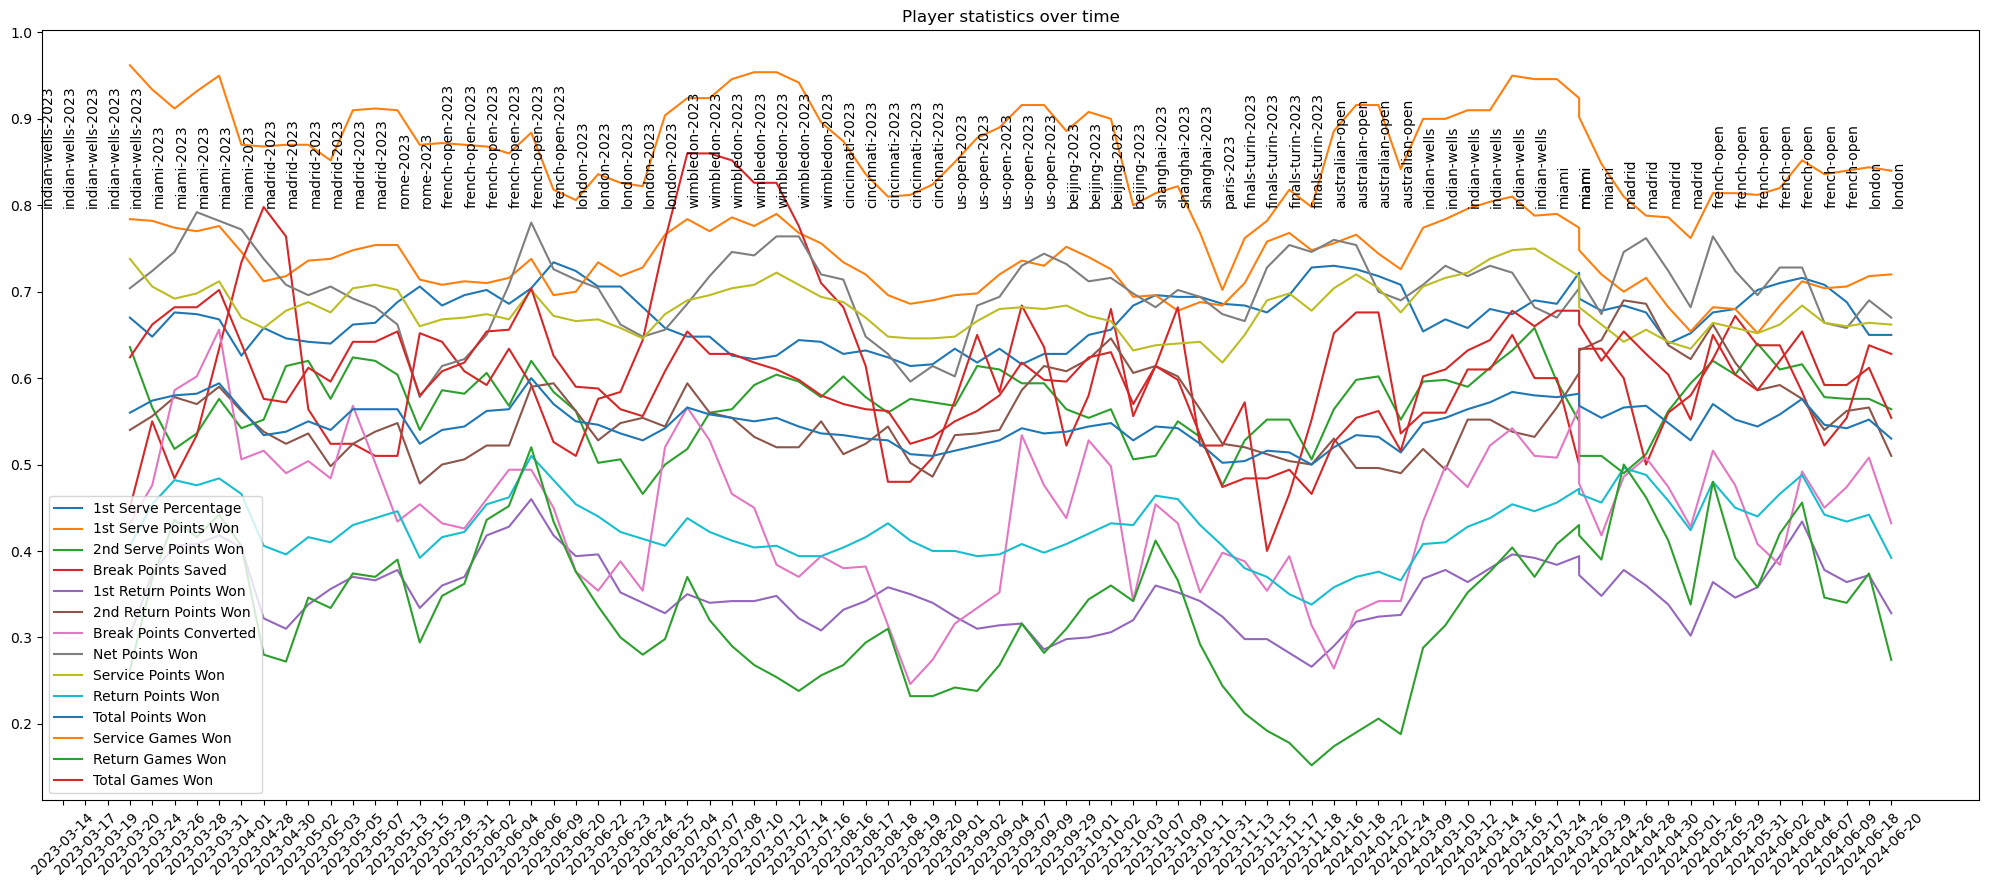

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))
for col in [
    '1st Serve Percentage', 
    '1st Serve Points Won', 
    '2nd Serve Points Won', 
    'Break Points Saved', 
    '1st Return Points Won', 
    '2nd Return Points Won',
    'Break Points Converted',
    'Net Points Won',
    'Service Points Won',
    'Return Points Won',
    'Total Points Won',
    'Service Games Won',
    'Return Games Won',
    'Total Games Won',
]:
    # rolling mean
    plt.plot(statistics_df['date_str'].values, statistics_df[col].rolling(window=5).mean().values, label=col)
plt.legend()
# add tournament names
for i, row in statistics_df.iterrows():
    plt.text(row['date_str'], 0.8, row['tournament'], rotation=90)
plt.xticks(rotation=45)
plt.title('Player statistics over time')
plt.show()

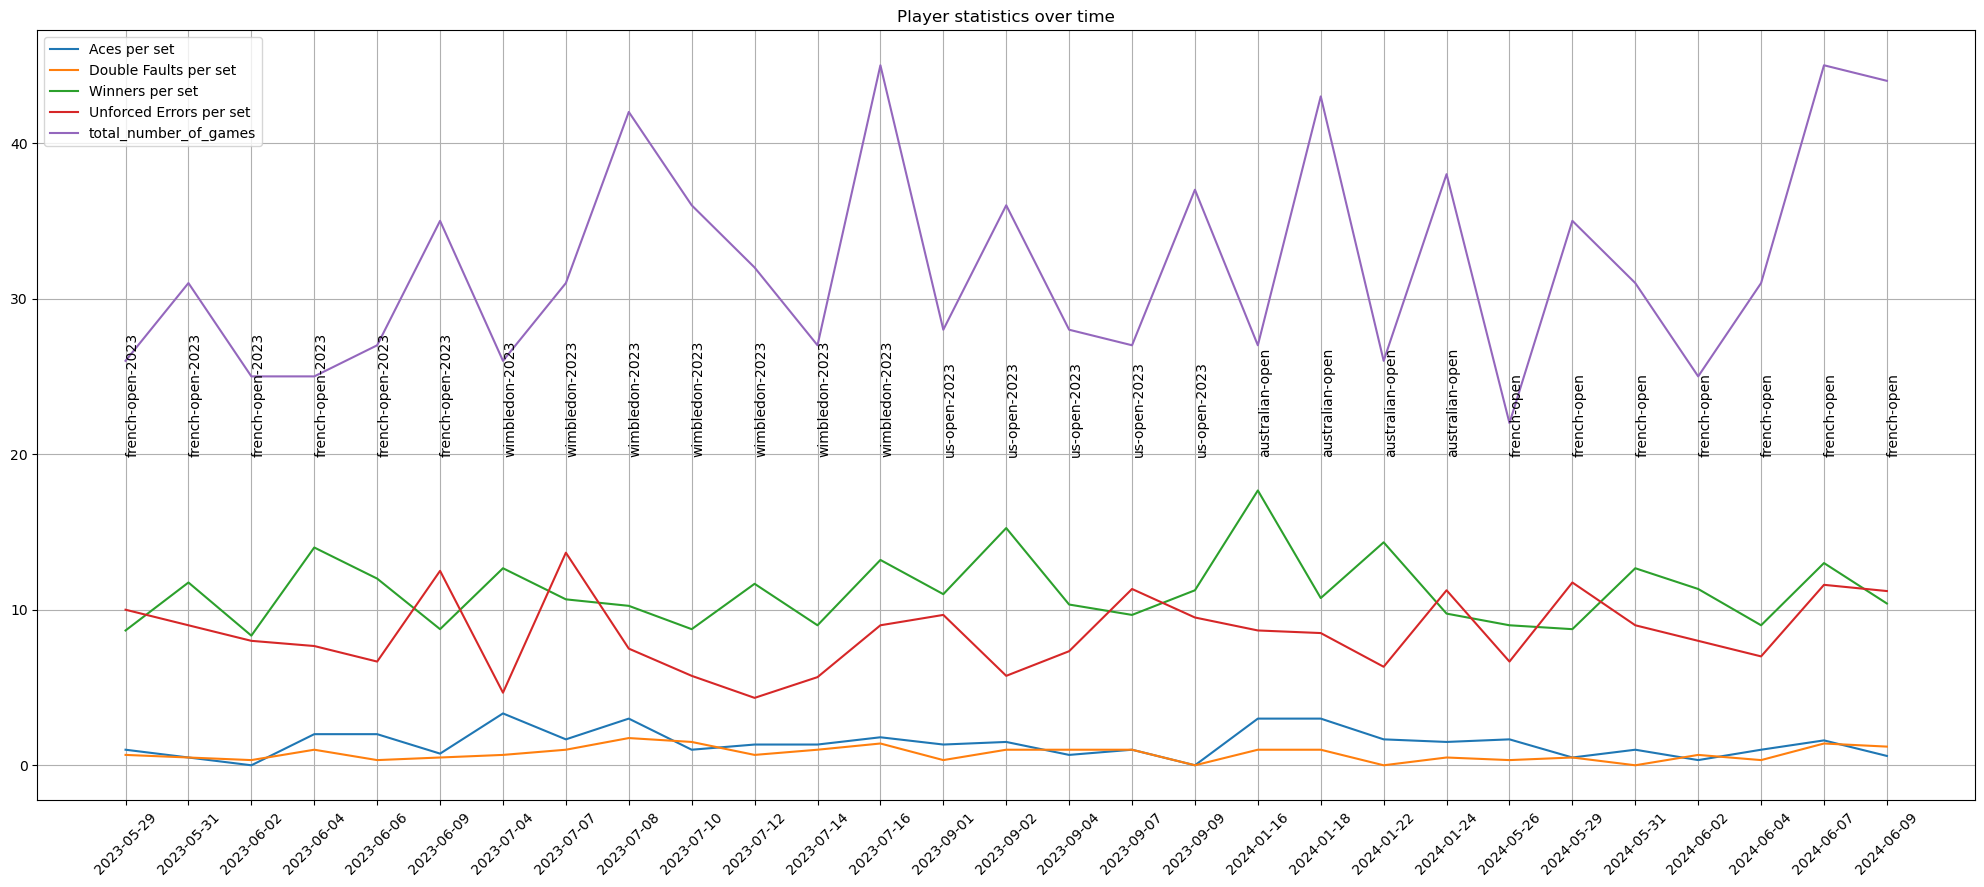

In [10]:
plt.figure(figsize=(25, 10))

grand_slams = statistics_df[statistics_df['tournament'].isin(['australian-open', 'french-open', 'us-open', 'wimbledon', 'australian-open-2023', 'french-open-2023', 'us-open-2023', 'wimbledon-2023'])]
others = statistics_df[~statistics_df['tournament'].isin(['australian-open', 'french-open', 'us-open', 'wimbledon', 'australian-open-2023', 'french-open-2023', 'us-open-2023', 'wimbledon-2023'])]

for col in [
    'Aces per set',
    'Double Faults per set',
    'Winners per set',
    'Unforced Errors per set',
    'total_number_of_games',
]:
    plt.plot(grand_slams['date_str'].values,grand_slams[col].values, label=col)
plt.legend()
plt.xticks(rotation=45)
# add tournament names
for i, row in grand_slams.iterrows():
    plt.text(row['date_str'], 20, row['tournament'], rotation=90)
plt.title('Player statistics over time')
plt.grid()
plt.show()